# <u>Clustering and PCA Assignment::: </u>

### Problem Statement :::

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. <b>Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the dire need of aid. </b>

### Objective :::

Main task is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided.

### Approach:::

Approach to meet the target is to analyze the country data by using clustering and PCA techniques. we need to cluster the countries by the socio economic factors mentioned in the data set provided. Also outlier analysis will be performed and clusters will be formed using both Kmeans and hierarchical clustering and final results will be presented in terms of which one is the better outcome of both the clustering methods and that is to be presented to the CEO in the form of PPT.

## Importing all the required libraries ->

In [225]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [226]:
#importing all the necessary libraries

import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data standardization/normalization libraries
from sklearn.preprocessing import scale

# Kmeans clustering libraries 
from sklearn.cluster import KMeans

# Hierarchical clustering libraries
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Data Understanding ->

<p style="font-family: Arial; font-size:1.2em;color:blue;"> <i>Note ::: The file path provided below is the local directory path. kincly change it to the respective directory path before execution of the code</i></p>

In [227]:
#Reading the data file

country_df = pd.read_csv("Country-data.csv")
country_df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [228]:
#checking the rows in the file

country_df.shape

(167, 10)

In [229]:
#checking the columns information. all the columns data types look fine and no need to change them.

country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [230]:
# Describing the data to get an idea on the statistical information about the data

country_df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [231]:
#Checking missing values if there are any for any of the columns

country_df.isnull().sum()*100/country_df.shape[0]

#and there are no missing values hence no handling required here.

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [232]:
#the below code is to check if there are all unique countries in the data file and the result is yes. 
#All countries are unique in the datafile

len(country_df['country'].unique())

167

In [233]:
country_df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

<p style="font-family: Arial; font-size:1.2em;color:blue;"> <i>Also, we can observe that percentage values for imports, exports and health variables don't give accurate or absolute values for that country. hence we can convert them to their corresponding absolute values for the better analysis of the data. </i></p>

In [234]:
#converting export, import and health percentage value to an absolute value based on GDPP (GDP per capita) value.

country_df['exports']=country_df['exports']*country_df['gdpp']/100
country_df['imports']=country_df['imports']*country_df['gdpp']/100
country_df['health']=country_df['health']*country_df['gdpp']/100

country_df.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

## Outlier Check for all the features ->

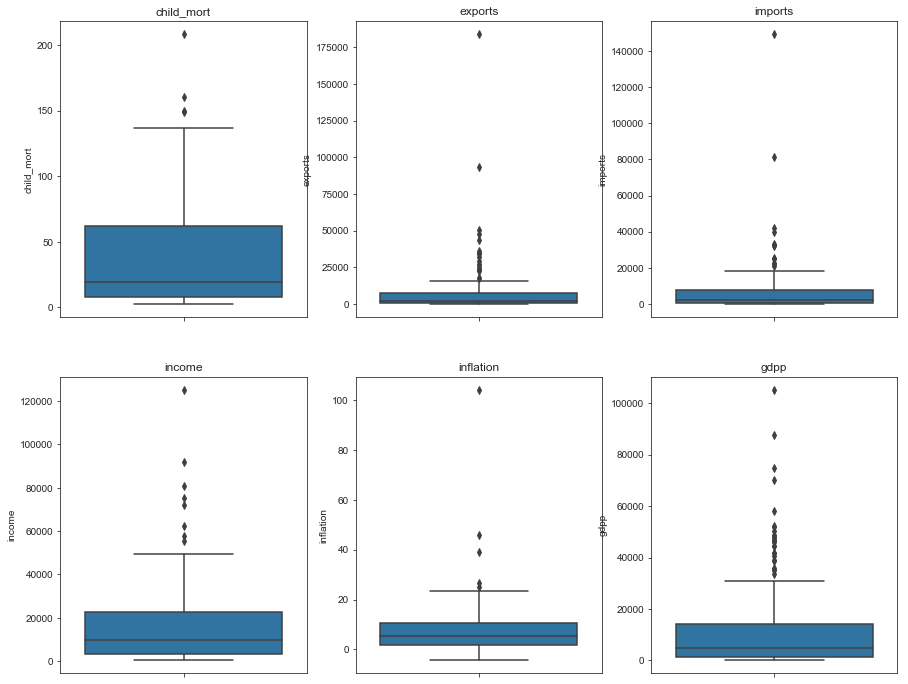

In [235]:
#After observing the statistical information about the numeric variables of the data. 
#plotting all the outliers using matplotlib library in combination with seaborn

# subplots
plt.figure(figsize=(15,12))
# subplot 1
plt.subplot(2, 3, 1)
plt.title('child_mort')
sns.boxplot(y = country_df['child_mort'])

# subplot 2
plt.subplot(2, 3, 2)
plt.title('exports')
sns.boxplot(y = country_df['exports'])

# subplot 3
plt.subplot(2, 3, 3)
plt.title('imports')
sns.boxplot(y = country_df['imports'])

# subplot 4
plt.subplot(2, 3, 4)
plt.title('income')
sns.boxplot(y = country_df['income'])

# subplot 5
plt.subplot(2,3,5)
plt.title('inflation')
sns.boxplot(y = country_df['inflation'])

# subplot 5
plt.subplot(2,3,6)
plt.title('gdpp')
sns.boxplot(y = country_df['gdpp'])

plt.show()


<p style="font-family: Arial; font-size:1.2em;color:blue;"> <i> 
We can observe from above box plots that there are outliers present for almost each feature in the dataset. But these are values for each country. <br> <br>For example: few under developed countries will have low life_expectency, low gdpp, low income, low imports and exports, etc and highly developed countries will have opposite values for the same set of factors. So considering this, each row provides data for each country and we can not ignore them. hence it is not required to handle outliers in this case </i></p> 

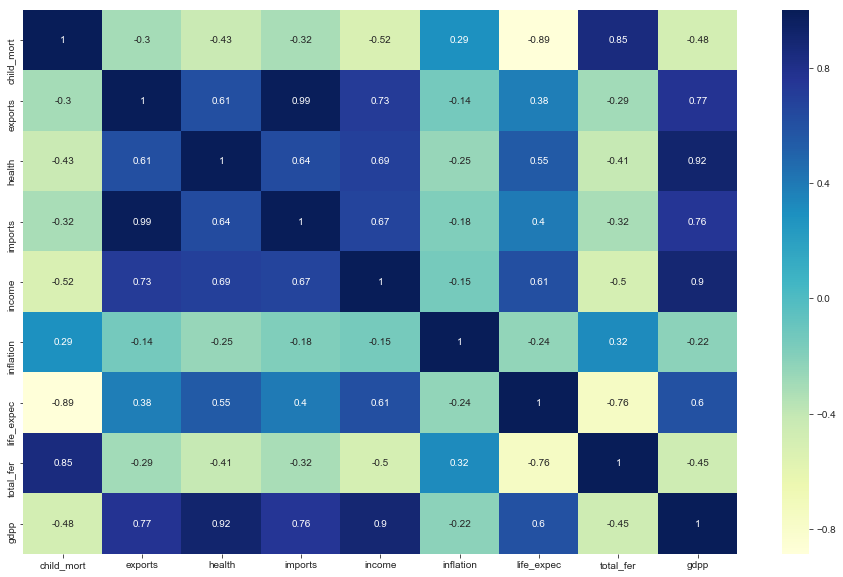

In [236]:
#Also, let's have a look at the heatmap to know the collinearity or correlation among the variables
plt.figure(figsize = (16, 10))
cor=country_df.corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")
plt.show()

<p style="font-family: Arial; font-size:1.2em;color:blue;"> <i> 
We can observe from above heat map that features like exports, imports, health, income, gdpp  are highly correlated with each other and hence usage of PCA is really worth using in this case before we move on to clustering.</i></p> 

## Principal Components Analysis (PCA) ->

### Data Standardization

In [237]:
#importing the required library for standard scaler

from sklearn.preprocessing import StandardScaler

In [238]:
#dropping the country column as it is not requied to be scaled
country_df_scaled = country_df.drop("country", axis=1)

In [239]:
standard_scaler = StandardScaler()
country_df_scaled = standard_scaler.fit_transform(country_df_scaled)

In [240]:
country_df_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [241]:
#changine the country_df_scaled to pandas dataframe and reassign the column names

country_df_scaled = pd.DataFrame(country_df_scaled)
country_df_scaled.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
country_df_scaled.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -0.411011 -0.565040 -0.432276 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.350191 -0.439218 -0.313677 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.318526 -0.484826 -0.353720 -0.220844   0.789274    0.670423   
3    2.007808 -0.291375 -0.532363 -0.345953 -0.585043   1.387054   -1.179234   
4   -0.695634 -0.104331 -0.178771  0.040735  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817

In [242]:
country_df_scaled.shape

(167, 9)

### Applying PCA on scaled dataset

In [243]:
#Assigning feature and target variables to x & y
x= country_df_scaled
y = country_df['country']

In [244]:
#Importing the PCA module
from sklearn.decomposition import PCA

In [245]:
#Fitting the PCA algorithm with our Data
pca = PCA(random_state=42)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [246]:
np.set_printoptions(suppress=True)

In [247]:
pca.explained_variance_ratio_

array([0.58937298, 0.18445169, 0.09911472, 0.06072278, 0.03029173,
       0.02459827, 0.00939744, 0.00155642, 0.00049398])

In [248]:
#get cumulative summation for explained variance ratio
np.cumsum(pca.explained_variance_ratio_)

array([0.58937298, 0.77382467, 0.87293939, 0.93366217, 0.96395389,
       0.98855216, 0.9979496 , 0.99950602, 1.        ])

In [249]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

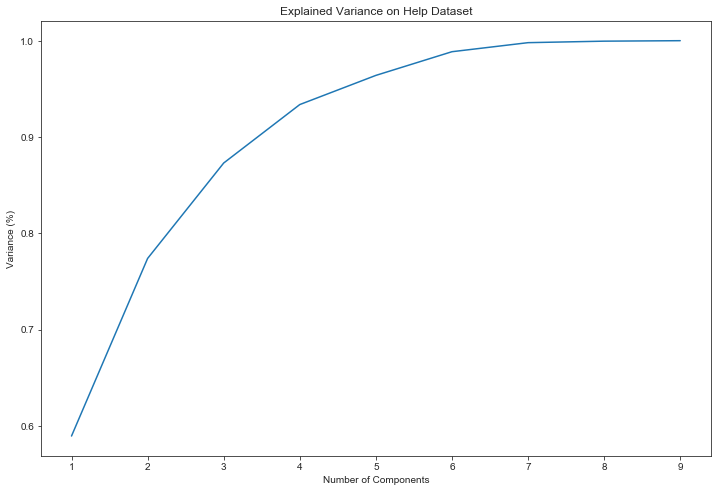

In [250]:
#Scree plot - Plotting the Cumulative Summation of the Explained Variance

plt.figure(figsize=(12,8))
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance on Help Dataset')
plt.show()

<p style="font-family: Arial; font-size:1.2em;color:blue;"> <i> 
The above scree plot indicates that with first 4 components we can preserve around 90 - 95% of the total variance of the data. Hence we can implement PCA for top 4 components explaining almost 90 - 95% of variance in the data. </i></p> 

In [251]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [252]:
country_df_scaled.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [253]:
#Around 95% of the information is being explained by first 4 components

col_names = list(country_df_scaled.columns)
country_pca_df = pd.DataFrame({ 'Feature':col_names,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2], 'PC4':pca.components_[3]})
country_pca_df

Feature       PC1       PC2       PC3       PC4
0  child_mort -0.316392  0.476267 -0.150012 -0.148052
1     exports  0.342887  0.397311 -0.030574  0.449425
2      health  0.358535  0.155053 -0.075703 -0.599712
3     imports  0.344865  0.370781 -0.072174  0.461798
4      income  0.380041  0.128384  0.145764 -0.154806
5   inflation -0.143085  0.221261  0.948419 -0.007628
6  life_expec  0.343857 -0.369820  0.196752 -0.018395
7   total_fer -0.302842  0.459715 -0.077834 -0.213928
8        gdpp  0.399988  0.200624  0.010339 -0.364772

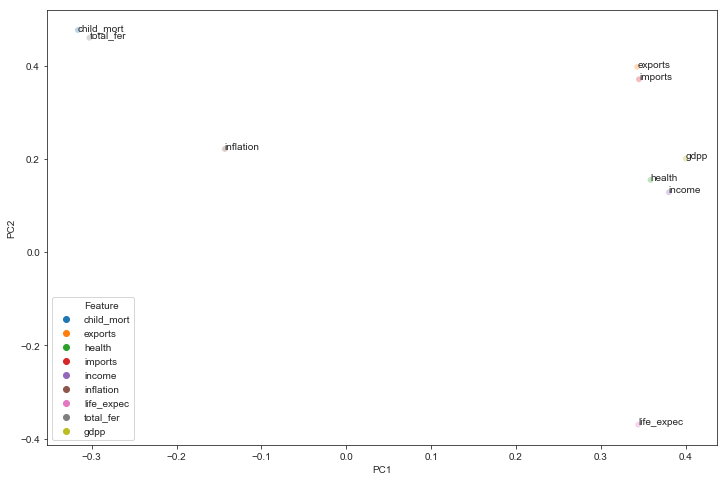

In [254]:
#plotting first two components for all the features using seaborn scatter plot

plt.figure(figsize=(12,8))
sns.scatterplot(
    x="PC1", y="PC2",
    hue="Feature",
    color='blue',
    data=country_pca_df,
    legend="full",
    alpha=0.3
)
for i, txt in enumerate(country_pca_df.Feature):
    plt.annotate(txt, (country_pca_df.PC1[i],country_pca_df.PC2[i]))

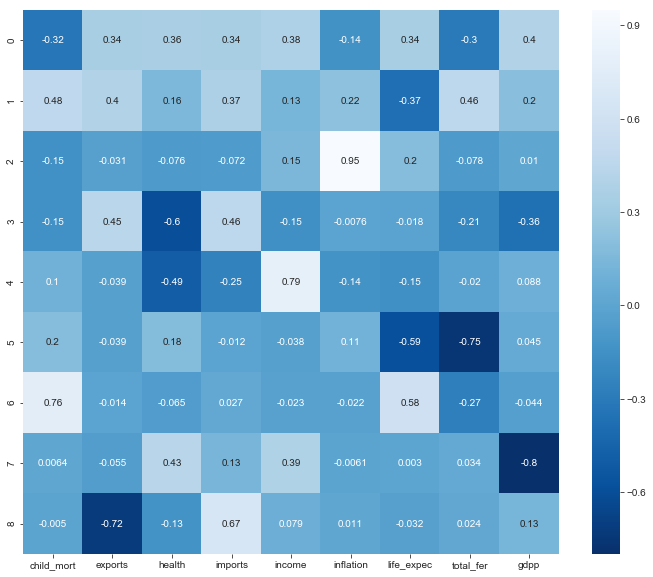

In [255]:
map= pd.DataFrame(pca.components_,columns=col_names)
plt.figure(figsize=(12,10))
sns.heatmap(map,cmap='Blues_r',annot=True)

In [256]:
country_df_scaled.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

### Using components = 4 with incrementalPCA method

In [257]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets

from sklearn.decomposition import IncrementalPCA

pca_final = IncrementalPCA(n_components=4)
pca_df_final=pca_final.fit_transform(country_df_scaled)
pca_df_final.shape

(167, 4)

In [258]:
pca_final.explained_variance_ratio_

array([0.58918825, 0.18377667, 0.09815906, 0.05595574])

In [259]:
pca_final.components_

array([[-0.31642716,  0.34181107,  0.35915034,  0.34367692,  0.38055414,
        -0.1429288 ,  0.34395127, -0.30321257,  0.40055688],
       [ 0.47980709,  0.39143361,  0.16009982,  0.36355289,  0.13487749,
         0.22111322, -0.36975876,  0.46074721,  0.20656644],
       [-0.15669498, -0.02093352, -0.10578279, -0.06934078,  0.16564642,
         0.94154725,  0.20112225, -0.06783367,  0.00296593],
       [ 0.1223805 , -0.45369446,  0.56917606, -0.47739264,  0.19174726,
         0.01329331,  0.04070174,  0.24677557,  0.35752021]])

In [260]:
#get cumulative summation of explained variance ratio
np.cumsum(pca_final.explained_variance_ratio_)

array([0.58918825, 0.77296491, 0.87112397, 0.92707971])

In [261]:
#taking transpose of the numpy array as to convert it to in the form of dataframe in a later stage
pca_df_tp = np.transpose(pca_df_final)

In [262]:
pca_df_tp[0]

array([-2.63664719, -0.02384536, -0.45926005, -2.72358099,  0.64877708,
        0.03644679, -0.33427415,  3.1843615 ,  3.8181372 , -0.46747543,
        1.49957973,  1.47129299, -1.01520291,  0.844517  , -0.01453496,
        3.9611022 , -0.40407459, -2.36500877, -0.71606924, -1.01892957,
        0.2512049 , -1.12955278,  0.16617442,  2.69869864,  0.2796299 ,
       -2.75261023, -2.76358752, -1.17996011, -2.4398994 ,  3.39776294,
       -0.52465362, -3.23814324, -3.18676012,  0.69145548, -0.13023688,
       -0.01503918, -1.94993473, -3.11605619, -2.04803223,  0.42991465,
       -2.57320863,  0.84582783,  2.31364253,  1.67418313,  4.3794232 ,
       -0.36871172, -0.30423519, -0.83771421, -0.3381214 , -1.05325585,
       -1.94899697,  1.06442426, -0.76332358,  3.20389913,  2.89520532,
       -1.28198433, -2.10566152, -0.36208851,  3.30216131, -2.00244565,
        1.93167149, -0.08637359, -0.85872378, -2.71346083, -2.60916678,
       -0.93290986, -3.93818385,  1.05106912,  3.10158963, -1.26

In [263]:
pca_df_final_2 = pd.DataFrame({'PC1':pca_df_tp[0],'PC2':pca_df_tp[1],'PC3':pca_df_tp[2],'PC4':pca_df_tp[3]})

In [264]:
pca_df_final_2.shape

(167, 4)

### Correlation matrix for the principal components

In [265]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(pca_df_final_2.transpose())

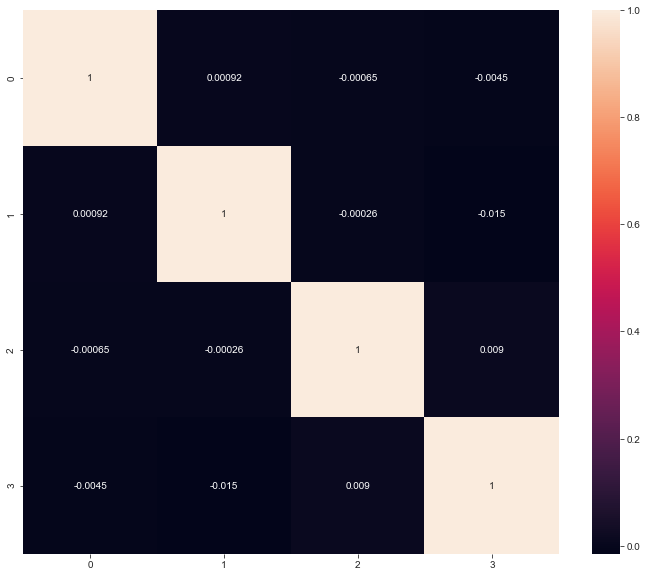

In [266]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (12,10))
sns.heatmap(corrmat,annot = True)

In [267]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.008959421276881594 , min corr:  -0.015302266510759163


<p style="font-family: Arial; font-size:1.2em;color:blue;"> <i> 
There is no correlation between any two components in the final dataframe obtained with principal components! 
We have removed multicollinearity from the dataframe effectively, and models built from such data tend to be more stable. </i></p> 

In [268]:
pca_df_final_2.shape

(167, 4)

In [269]:
#Adding feature column to PCA final dataframe

pca_temp_df = pd.DataFrame({'PC1':pca_final.components_[0],'PC2':pca_final.components_[1],
                         'PC3':pca_final.components_[2],'PC4':pca_final.components_[3],'Feature':col_names})
pca_temp_df

PC1       PC2       PC3       PC4     Feature
0 -0.316427  0.479807 -0.156695  0.122380  child_mort
1  0.341811  0.391434 -0.020934 -0.453694     exports
2  0.359150  0.160100 -0.105783  0.569176      health
3  0.343677  0.363553 -0.069341 -0.477393     imports
4  0.380554  0.134877  0.165646  0.191747      income
5 -0.142929  0.221113  0.941547  0.013293   inflation
6  0.343951 -0.369759  0.201122  0.040702  life_expec
7 -0.303213  0.460747 -0.067834  0.246776   total_fer
8  0.400557  0.206566  0.002966  0.357520        gdpp

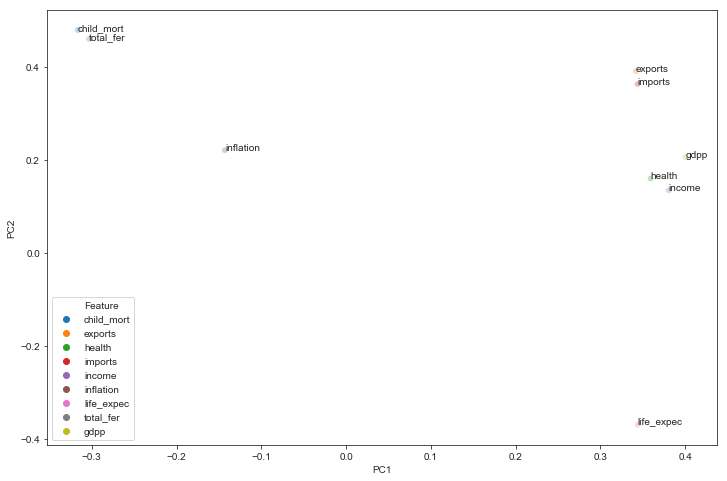

In [270]:
#plotting first two components for all the features using seaborn scatter plot

plt.figure(figsize=(12,8))
sns.scatterplot(
    x="PC1", y="PC2",
    hue="Feature",
    color='blue',
    data=pca_temp_df,
    legend="full",
    alpha=0.3
)
for i, txt in enumerate(pca_temp_df.Feature):
    plt.annotate(txt, (pca_temp_df.PC1[i],pca_temp_df.PC2[i]))

<p style="font-family: Arial; font-size:1.2em;color:blue;"> <i> 
From above plot of first and second principal components, it can be observed that <br><br>
1. First component is in the direction where the 'health', 'life_exp', 'gdpp', 'income' variables have more value. <br>
2. Both components are in the direction where the 'import' and 'export' variables have more value. <br>
3. Second component in the direction where the 'child_mort' and 'total_fert' variables have more value. <br>
</i></p> 

## Clustering Analysis ->

### Hopkins Statistic

<b>
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered. </b><br>

If the value is between {0.01, ...,0.3}, the data is regularly spaced. <br>
If the value is around 0.5, it is random. <br>
If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [271]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [272]:
hopkins(pca_df_final_2)*100

94.87622472814407

<p style="font-family: Arial; font-size:1.2em;color:blue;"> <i> 
It can be observed that the data has a high tendency to cluster when checked with hopkins statistic.
</i></p> 


### Elbow-curve / SSD (Sum of Squared Distances) method  to find optimal number of clusters

In [273]:
pca_df_final_2.head()

PC1       PC2       PC3       PC4
0 -2.636647  1.472085 -0.546500  0.237267
1 -0.023845 -1.435816 -0.009080 -0.442921
2 -0.459260 -0.678794  0.967852 -0.176389
3 -2.723581  2.176018  0.597794  0.438919
4  0.648777 -1.026498 -0.244170 -0.267513

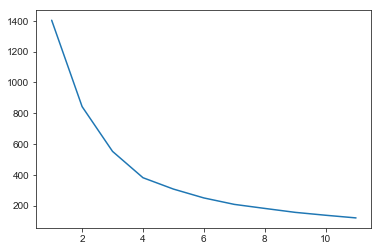

In [274]:
#implementing elbow-curve method

ssd = []
for i in range(1,12):
    kmeans = KMeans(n_clusters = i, max_iter=50, random_state=42)
    kmeans.fit(pca_df_final_2)
    ssd.append([i, kmeans.inertia_])

plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

### Silhouette Score method to find optimal number of clusters

#### Silhouette Score formula :::

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

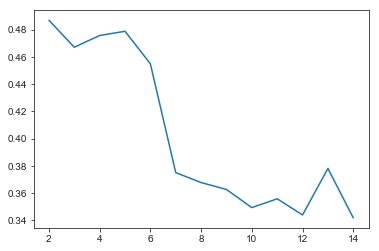

In [275]:
#implementing silhourette score method to find k

from sklearn.metrics import silhouette_score

sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(pca_df_final_2)
    sse_.append([k, silhouette_score(pca_df_final_2, kmeans.labels_)])
    
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

<p style="font-family: Arial; font-size:1.2em;color:blue;"> <i> 
From the above two methods to derive the optimal number of clusters, we can say that Elbow curve method gives a very precise picture of the elbow curve at no of components = 4. Where in case of, Silhouette score method plot, though there is a rise of data point at the no of components = 4, also there is a bit rise at the no of components = 2. <br><br>

Hence,, we can consider k = 4 as the optimal number for clustering as the result of the analysis of both SSD and silhouette score methods.</i></p> 


### Applying KMeans clustering algorithm on dataset with value of K=4

In [276]:
kmeans4 = KMeans(n_clusters = 4, random_state=42, max_iter=1000)
kmeans4.fit(pca_df_final_2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

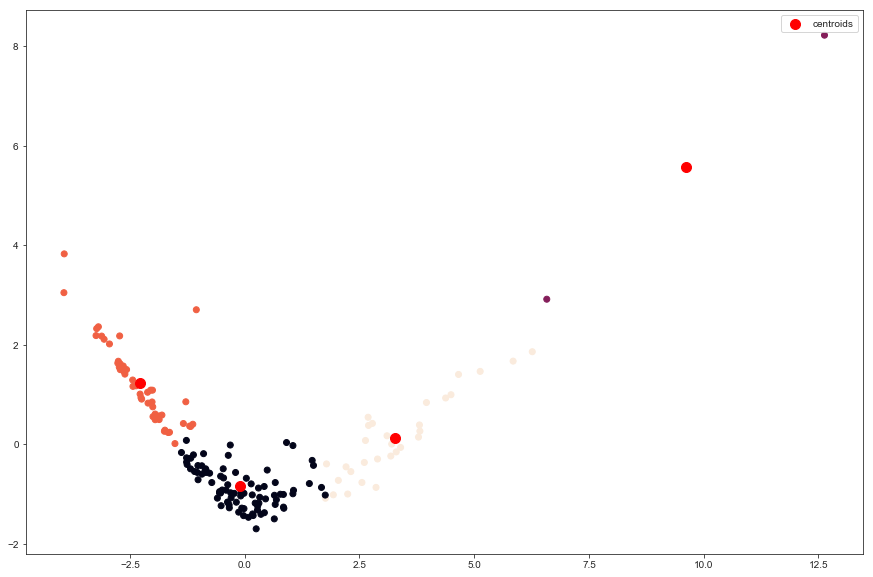

In [277]:
#Visualizing  clusters

plt.figure(figsize=(15, 10))
plt.scatter(pca_df_final_2.values[:,0], pca_df_final_2.values[:,1], c=kmeans4.labels_.astype(float))
plt.scatter(kmeans4.cluster_centers_[:,0],kmeans4.cluster_centers_[:,1],s=100, c='red', label ='centroids')
plt.legend()

In [278]:
#also applying kemans on dataset with k=5 to check on results obtained

kmeans5 = KMeans(n_clusters = 5, random_state=42, max_iter=1000)
kmeans5.fit(pca_df_final_2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

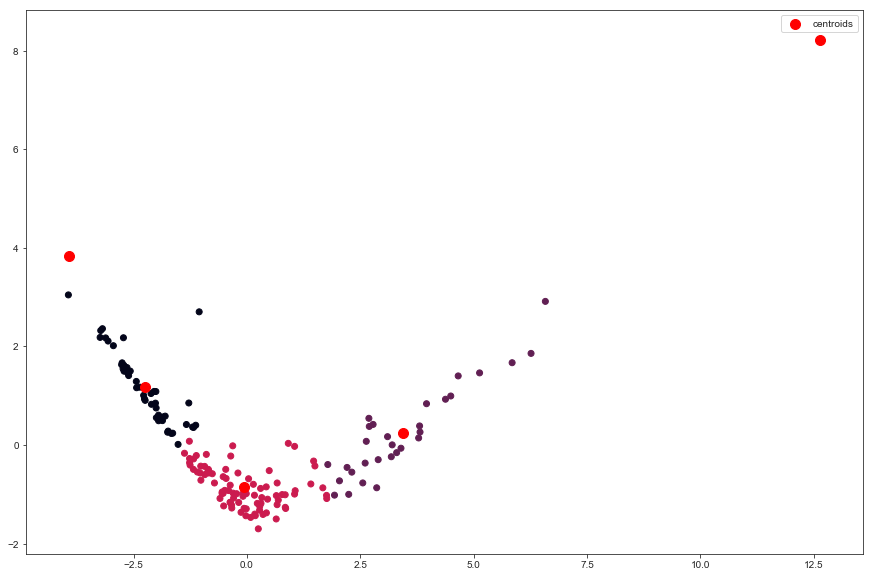

In [279]:
#Visualize clusters
plt.figure(figsize=(15, 10))
plt.scatter(pca_df_final_2.values[:,0], pca_df_final_2.values[:,1], c=kmeans5.labels_.astype(float))
plt.scatter(kmeans5.cluster_centers_[:,0],kmeans5.cluster_centers_[:,1],s=100, c='red', label ='centroids')
plt.legend()

<p style="font-family: Arial; font-size:1.2em;color:blue;"> <i> 
We can observe that Clusters are well formed with k = 4 and gives a clear picture of the dataset </i></p> 


In [280]:
pca_df_final_2.head()

PC1       PC2       PC3       PC4
0 -2.636647  1.472085 -0.546500  0.237267
1 -0.023845 -1.435816 -0.009080 -0.442921
2 -0.459260 -0.678794  0.967852 -0.176389
3 -2.723581  2.176018  0.597794  0.438919
4  0.648777 -1.026498 -0.244170 -0.267513

In [281]:
#list(country_df['country'])

In [282]:
#Add country column to the final PCA dataframe

pca_df_final_2 = pd.DataFrame({'country': list(country_df['country']),'PC1':pca_df_tp[0],'PC2':pca_df_tp[1],'PC3':pca_df_tp[2],'PC4':pca_df_tp[3]})

In [283]:
pca_df_final_2.head()

country       PC1       PC2       PC3       PC4
0          Afghanistan -2.636647  1.472085 -0.546500  0.237267
1              Albania -0.023845 -1.435816 -0.009080 -0.442921
2              Algeria -0.459260 -0.678794  0.967852 -0.176389
3               Angola -2.723581  2.176018  0.597794  0.438919
4  Antigua and Barbuda  0.648777 -1.026498 -0.244170 -0.267513

In [284]:
#Let's add the cluster ID's to the pca data
country_km_df  = pd.concat([pca_df_final_2.reset_index().drop('index', axis=1), pd.Series(kmeans4.labels_)], axis =1 )
country_km_df.columns =  ['country','PC1','PC2','PC3','PC4','ClusterID']
country_km_df.head()

country       PC1       PC2       PC3       PC4  ClusterID
0          Afghanistan -2.636647  1.472085 -0.546500  0.237267          2
1              Albania -0.023845 -1.435816 -0.009080 -0.442921          0
2              Algeria -0.459260 -0.678794  0.967852 -0.176389          0
3               Angola -2.723581  2.176018  0.597794  0.438919          2
4  Antigua and Barbuda  0.648777 -1.026498 -0.244170 -0.267513          0

In [285]:
#checking the counts for each cluster formed

country_km_df['ClusterID'].value_counts()

0    87
2    48
3    30
1     2
Name: ClusterID, dtype: int64

In [286]:
country_km_df[country_km_df.ClusterID == 1]

country        PC1       PC2       PC3       PC4  ClusterID
91   Luxembourg  12.633634  8.219800 -0.571184 -4.587245          1
133   Singapore   6.582494  2.913633 -0.224591 -3.496339          1

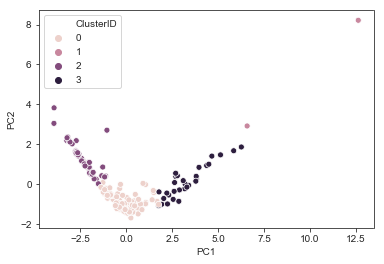

In [287]:
#Plot the clusters with respect to the clusters obtained
sns.scatterplot(x='PC1', y='PC2', hue='ClusterID', legend = 'full', data=country_km_df)

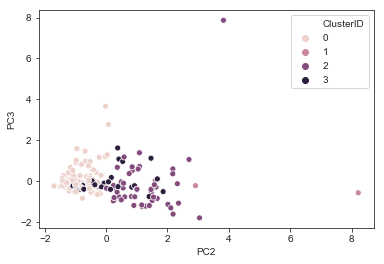

In [288]:
#Plot the clusters with respect to the clusters obtained
sns.scatterplot(x='PC2', y='PC3', hue='ClusterID', legend = 'full', data=country_km_df)

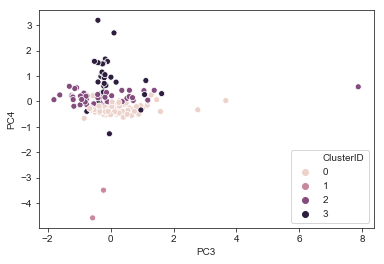

In [289]:
#Plot the clusters with respect to the clusters obtained
sns.scatterplot(x='PC3', y='PC4', hue='ClusterID', legend = 'full', data=country_km_df)

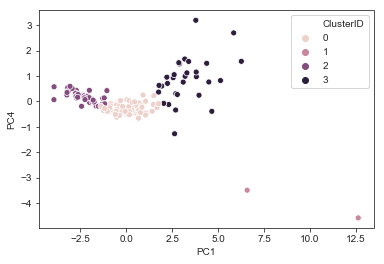

In [290]:
sns.scatterplot(x='PC1', y='PC4', hue='ClusterID', legend = 'full', data=country_km_df)

In [291]:
country_df.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

### Merging ClusterID's with original dataset

In [292]:
country_km_df_org  = pd.merge(country_df, country_km_df, how='inner', on='country')
country_km_df_org.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp       PC1       PC2       PC3  \
0       9.44        56.2       5.82    553 -2.636647  1.472085 -0.546500   
1       4.49        76.3       1.65   4090 -0.023845 -1.435816 -0.009080   
2      16.10        76.5       2.89   4460 -0.459260 -0.678794  0.967852   
3      22.40        60.1       6.16   3530 -2.723581  2.176018  0.597794   
4       1.44        76.8       2.13  12200  0.648777 -1.026498 -0.244170   

        PC4  ClusterID  
0  0.237267          2  
1 -0.442921          0  
2 -0.176389          0  
3  0.438919          2  
4 -0.267513          0

In [293]:
country_km_df_org.shape

(167, 15)

In [294]:
country_km_df_org.drop(['PC1','PC2','PC3','PC4'], axis=1, inplace=True)

In [295]:
country_km_df_org.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  ClusterID  
0       9.44        56.2       5.82    553          2  
1       4.49        76.3       1.65   4090          0  
2      16.10        76.5       2.89   4460          0  
3      22.40        60.1       6.16   3530          2  
4       1.44        76.8       2.13  12200          0

### gdpp, child_mort and income wise pair plot with respect to ClusterID :

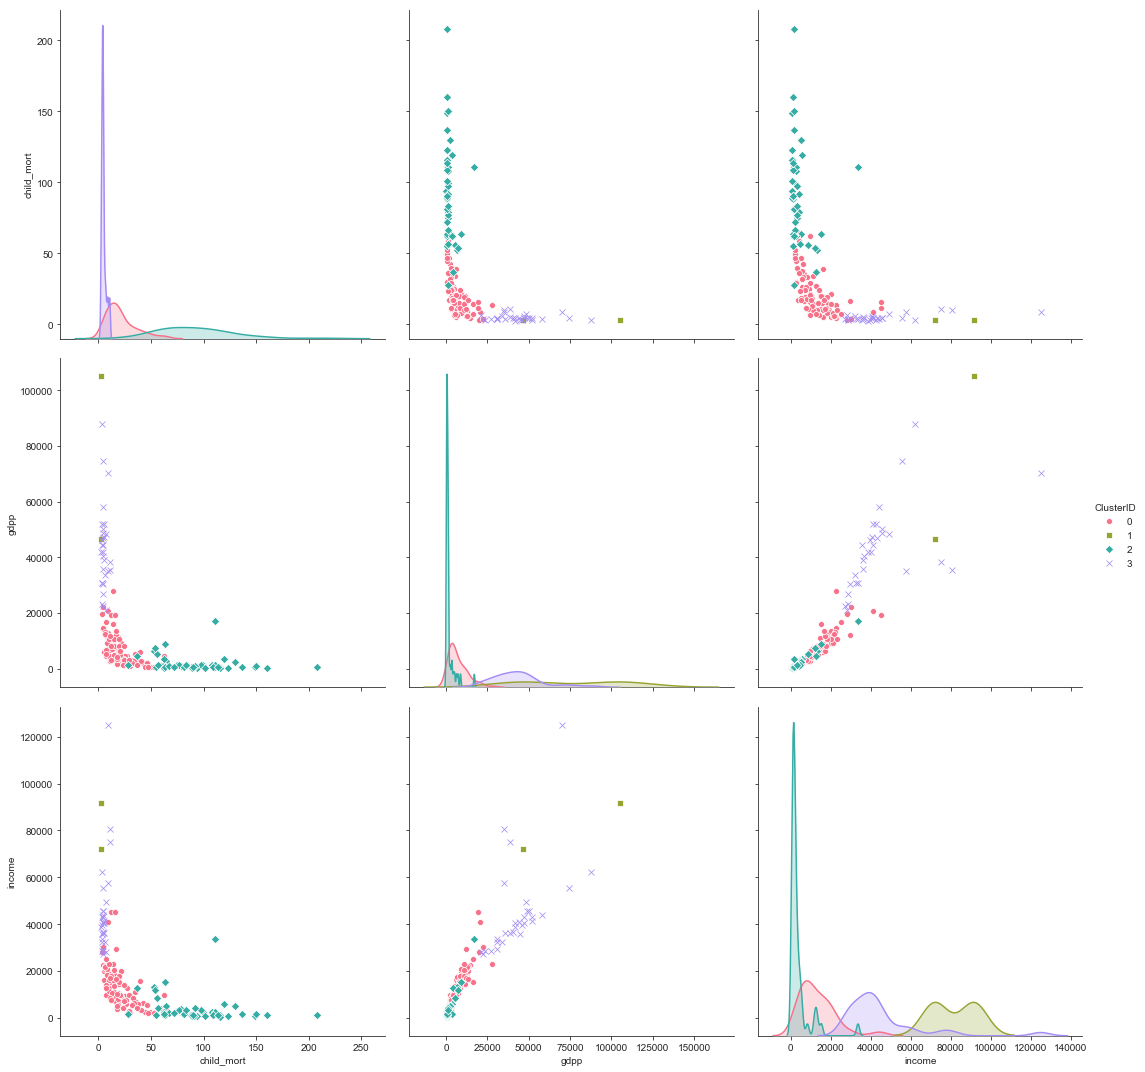

In [296]:
sns.set_style("ticks")
sns.pairplot(data=country_km_df_org, vars=['child_mort','gdpp','income'], hue = "ClusterID", height=5,  markers=["o", "s", "D", "x"], palette = "husl"
)

<p style="font-family: Arial; font-size:1.2em;color:blue;"> <i> 
We can clearly observe from the above pair plot that Cluster with ClusterID-2 has the list of under-developed countries.
Child mortality rate is high for Cluster-2 and gdpp and income is at a very low range for Cluster-2 as seen from the above pairplots.
</i></p> 


# Cluster Profiling/Analysis for KMeans Clustering->

In [297]:
#Calculating mean of each variable grouped by 'cluster ID'
child_mort_mean = pd.DataFrame(country_km_df_org.groupby(['ClusterID']).child_mort.mean())
exports_mean = pd.DataFrame(country_km_df_org.groupby(['ClusterID']).exports.mean())
health_mean = pd.DataFrame(country_km_df_org.groupby(['ClusterID']).health.mean())
imports_mean = pd.DataFrame(country_km_df_org.groupby(['ClusterID']).imports.mean())
income_mean = pd.DataFrame(country_km_df_org.groupby(['ClusterID']).income.mean())
inflation_mean = pd.DataFrame(country_km_df_org.groupby(['ClusterID']).inflation.mean())
life_expec_mean = pd.DataFrame(country_km_df_org.groupby(['ClusterID']).life_expec.mean())
total_fer_mean = pd.DataFrame(country_km_df_org.groupby(['ClusterID']).total_fer.mean())                           
gdpp_mean = pd.DataFrame(country_km_df_org.groupby(['ClusterID']).gdpp.mean())                             

In [298]:
child_mort_mean

child_mort
ClusterID            
0           21.113793
1            2.800000
2           91.610417
3            5.043333

In [299]:
country_profile_df = pd.concat([child_mort_mean, exports_mean, health_mean, imports_mean, 
                                income_mean, inflation_mean, life_expec_mean, total_fer_mean, gdpp_mean], axis=1)

In [300]:

country_profile_df.head()

child_mort        exports       health        imports  \
ClusterID                                                          
0           21.113793    3328.149408   460.000120    3404.497944   
1            2.800000  138475.000000  5001.930000  115092.000000   
2           91.610417     879.063521   114.821765     827.028771   
3            5.043333   21018.310000  4031.304333   17806.070000   

                 income  inflation  life_expec  total_fer          gdpp  
ClusterID                                                                
0          13297.586207   7.371506   73.147126   2.251954   7158.298851  
1          81900.000000   1.787000   82.000000   1.390000  75800.000000  
2           3897.354167  11.911146   59.239583   4.992083   1909.208333  
3          45180.000000   2.764533   80.383333   1.799667  43300.000000

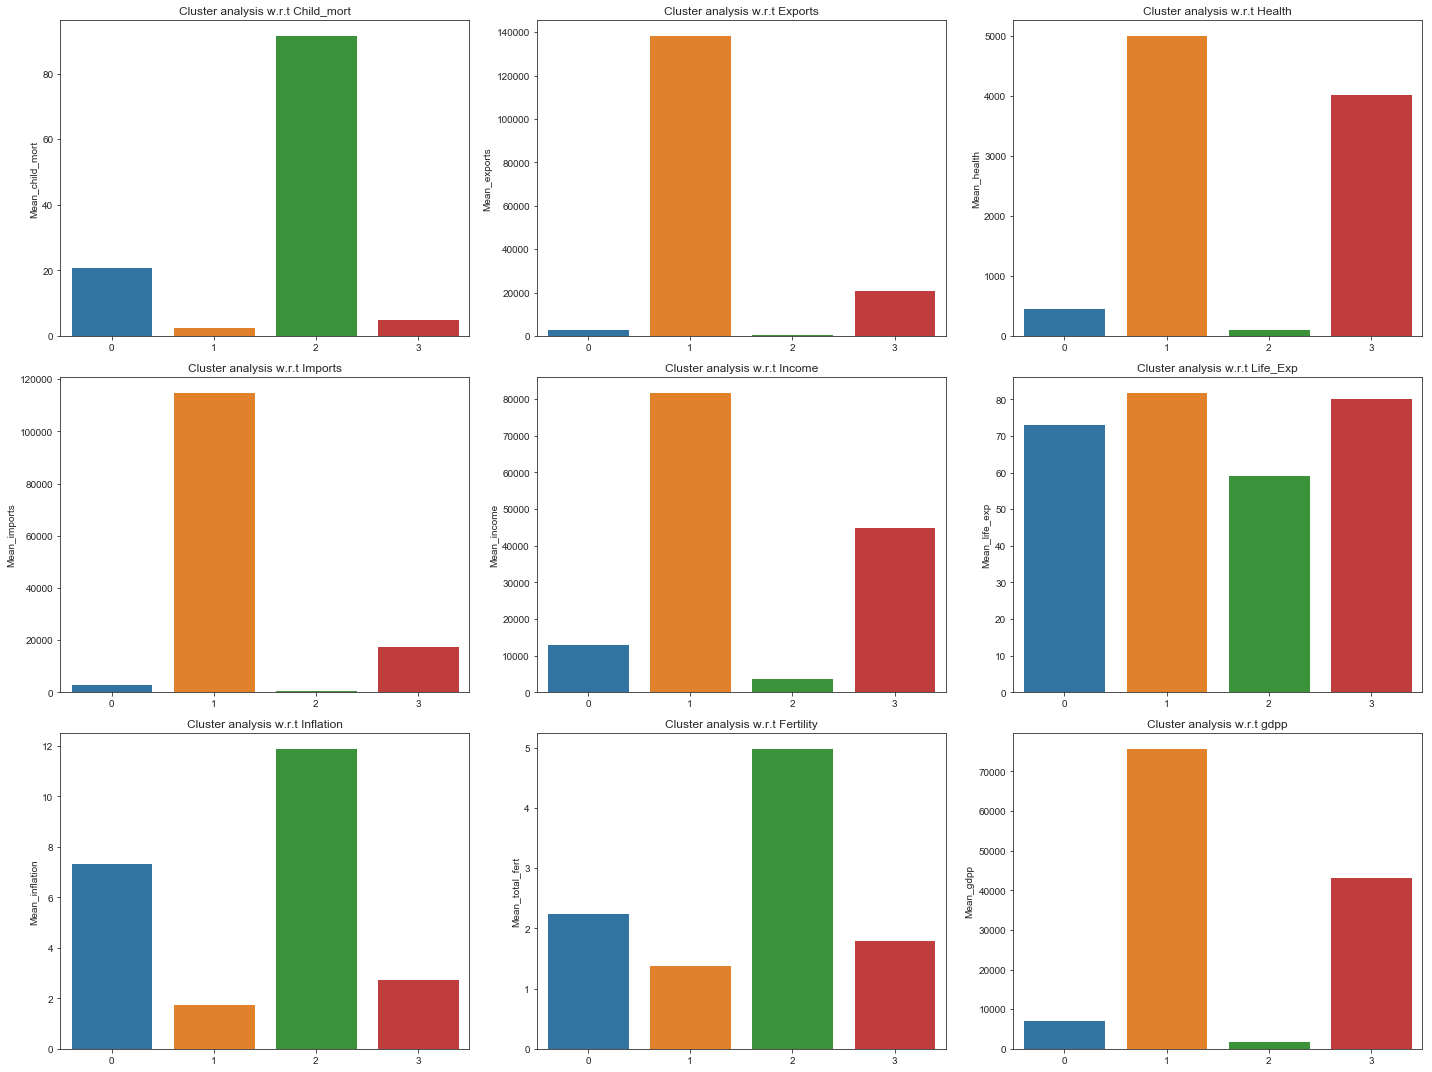

In [301]:
#plotting bar chart 
fig, axs= plt.subplots(3,3,figsize = (20,15))

# Child_mort
plt1 = sns.barplot(x=country_profile_df.index, y=country_profile_df.child_mort, ax = axs[0,0])
plt1.set(title = 'Cluster analysis w.r.t Child_mort', xlabel = '', ylabel= 'Mean_child_mort')

# Exports
plt2 = sns.barplot(x=country_profile_df.index, y=country_profile_df.exports, ax = axs[0,1])
plt2.set(title = 'Cluster analysis w.r.t Exports', xlabel = '', ylabel= 'Mean_exports')

# Health
plt3 = sns.barplot(x=country_profile_df.index, y=country_profile_df.health, ax = axs[0,2])
plt3.set(title = 'Cluster analysis w.r.t Health', xlabel = '', ylabel= 'Mean_health')

# Imports
plt4 = sns.barplot(x=country_profile_df.index, y=country_profile_df.imports, ax = axs[1,0])
plt4.set(title = 'Cluster analysis w.r.t Imports', xlabel = '', ylabel= 'Mean_imports')

# Income
plt5 = sns.barplot(x=country_profile_df.index, y=country_profile_df.income, ax = axs[1,1])
plt5.set(title = 'Cluster analysis w.r.t Income', xlabel = '', ylabel= 'Mean_income')

# Life_Exp
plt6 = sns.barplot(x=country_profile_df.index, y=country_profile_df.life_expec, ax = axs[1,2])
plt6.set(title = 'Cluster analysis w.r.t Life_Exp', xlabel = '', ylabel= 'Mean_life_exp')

# Inflation
plt7= sns.barplot(x=country_profile_df.index, y=country_profile_df.inflation, ax = axs[2,0])
plt7.set(title = 'Cluster analysis w.r.t Inflation', xlabel = '', ylabel= 'Mean_inflation')

# Fertility
plt8 = sns.barplot(x=country_profile_df.index, y=country_profile_df.total_fer, ax = axs[2,1])
plt8.set(title = 'Cluster analysis w.r.t Fertility', xlabel = '', ylabel= 'Mean_total_fert')

# gdpp
plt9 = sns.barplot(x=country_profile_df.index, y=country_profile_df.gdpp, ax = axs[2,2])
plt9.set(title = 'Cluster analysis w.r.t gdpp', xlabel = '', ylabel= 'Mean_gdpp')

plt.tight_layout()
plt.show()


<p style="font-family: Arial; font-size:1.2em;color:blue;"> <i> 
    From above bar plots, we can conclude that Cluster with <u><b> ClusterID - 2 </b></u>, is the cluster which contains the list of under developed countries and cluster with<u> <b>ClusterID - 1</b></u>, is the cluster which contains the list of developed countries.

</i></p> 


In [302]:
country_profile_df.iloc[:]

child_mort        exports       health        imports  \
ClusterID                                                          
0           21.113793    3328.149408   460.000120    3404.497944   
1            2.800000  138475.000000  5001.930000  115092.000000   
2           91.610417     879.063521   114.821765     827.028771   
3            5.043333   21018.310000  4031.304333   17806.070000   

                 income  inflation  life_expec  total_fer          gdpp  
ClusterID                                                                
0          13297.586207   7.371506   73.147126   2.251954   7158.298851  
1          81900.000000   1.787000   82.000000   1.390000  75800.000000  
2           3897.354167  11.911146   59.239583   4.992083   1909.208333  
3          45180.000000   2.764533   80.383333   1.799667  43300.000000

In [303]:
len(country_km_df_org[country_km_df_org.ClusterID == 2])

48

In [304]:
country_km_df_org[country_km_df_org.ClusterID == 2].country.values

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands',
       'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo',
       'Uganda', 'Yemen', 'Zambia'], dtype=object)


<p style="font-family: Arial; font-size:1.2em;color:blue;"> <i> 
    Mentioned above is the list of countries which are in dire need of aid and help


</i></p> 


List of first 10 countries in cluster 2 with respect to [gdpp, child_mort and income] variables which are in dire need of help.

In [305]:
country_km_df_org.sort_values(by = ['child_mort','income','gdpp'], ascending=False).head(10)

country  child_mort   exports    health   imports  \
66                      Haiti       208.0   101.286   45.7442   428.314   
132              Sierra Leone       160.0    67.032   52.2690   137.655   
32                       Chad       150.0   330.096   40.6341   390.195   
31   Central African Republic       149.0    52.628   17.7508   118.190   
97                       Mali       137.0   161.424   35.2584   248.508   
113                   Nigeria       130.0   589.490  118.1310   405.420   
112                     Niger       123.0    77.256   17.9568   170.868   
3                      Angola       119.0  2199.190  100.6050  1514.370   
25               Burkina Faso       116.0   110.400   38.7550   170.200   
37           Congo, Dem. Rep.       116.0   137.274   26.4194   165.664   

     income  inflation  life_expec  total_fer  gdpp  ClusterID  
66     1500       5.45        32.1       3.33   662          2  
132    1220      17.20        55.0       5.20   399          2  
32     1930       6.39        56.5       6.59   897          2  
31      888       2.01        47.5       5.21   446          2  
97     1870       4.37        59.5       6.55   708          2  
113    5150     104.00        60.5       5.84  2330          2  
112     814       2.55        58.8       7.49   348          2  
3      5900      22.40        60.1       6.16  3530          2  
25     1430       6.81        57.9       5.87   575          2  
37      609      20.80        57.5       6.54   334          2

<p style="font-family: Arial; font-size:1.2em;color:blue;"> <i> 
    Mentioned above is the list of first 10 countries which are in dire need of aid and financial help.


</i></p> 


# Hierarchical Clustering ->

In [306]:
pca_df_final_2.head()

country       PC1       PC2       PC3       PC4
0          Afghanistan -2.636647  1.472085 -0.546500  0.237267
1              Albania -0.023845 -1.435816 -0.009080 -0.442921
2              Algeria -0.459260 -0.678794  0.967852 -0.176389
3               Angola -2.723581  2.176018  0.597794  0.438919
4  Antigua and Barbuda  0.648777 -1.026498 -0.244170 -0.267513

In [307]:
#Getting the copy of pca data for hierarchical clustering
hie_pca_df = pca_df_final_2.copy()

In [308]:
hie_pca_df.drop('country',axis=1,inplace=True)

In [309]:
hie_pca_df.shape

(167, 4)

### Hierarchical clustering using single linkage

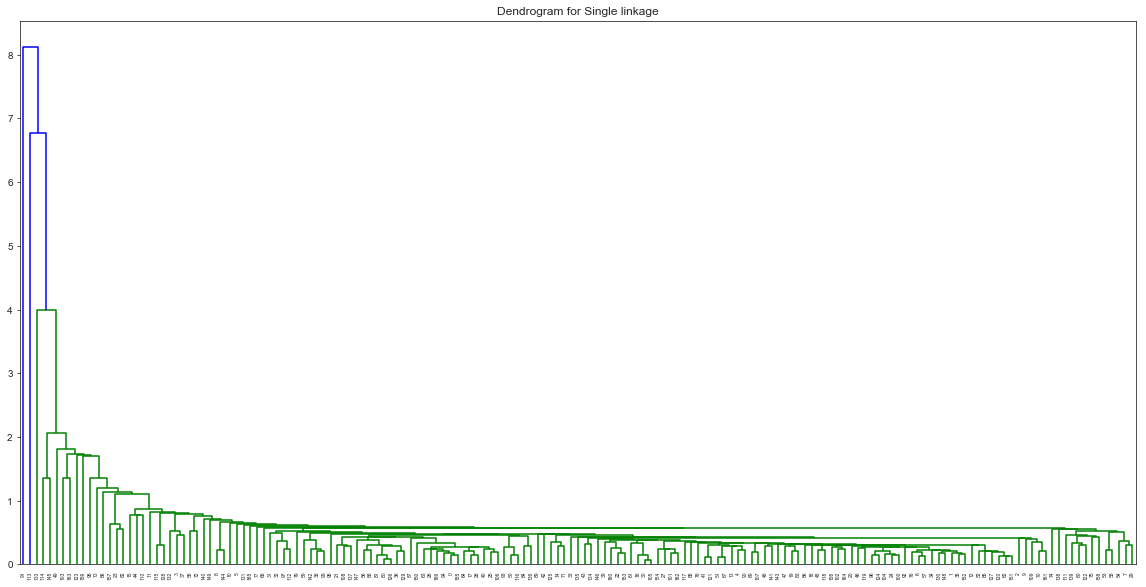

In [310]:
# Hierarchical clustering using ingle linkage
plt.figure(figsize=(20,10))
mergings_single = linkage(hie_pca_df, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.title('Dendrogram for Single linkage')
plt.show()

### Hierarchical clustering using Complete linkage

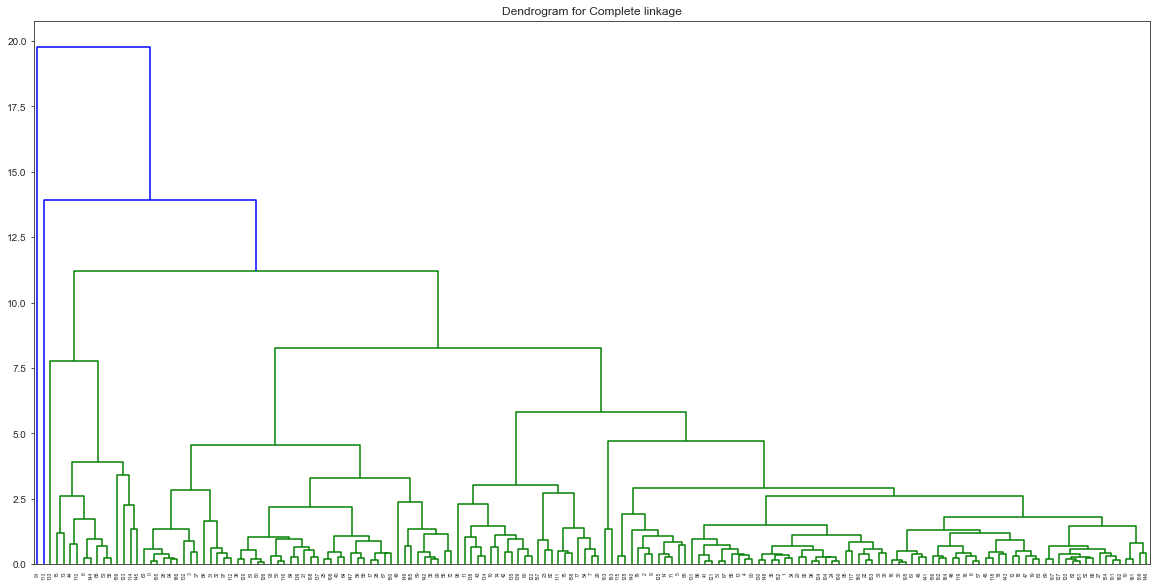

In [311]:
#Complete linkage

plt.figure(figsize=(20,10))
mergings_complete = linkage(hie_pca_df, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.title('Dendrogram for Complete linkage')
plt.show()



<p style="font-family: Arial; font-size:1.2em;color:blue;"> <i> 
We can observe from the above two plots of single linkage and complete linkage that hierarchical clustering with complete linkage gives us more clear picture on optimal number of clusters that we can use. <br><br>
Here we can use <b><u>no of clusters as 4 </u></b> and move on with next steps of clustering

</i></p> 

In [312]:
# 4 clusters
complete_cluster_labels = cut_tree(mergings_complete, n_clusters=4).reshape(-1, )
complete_cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

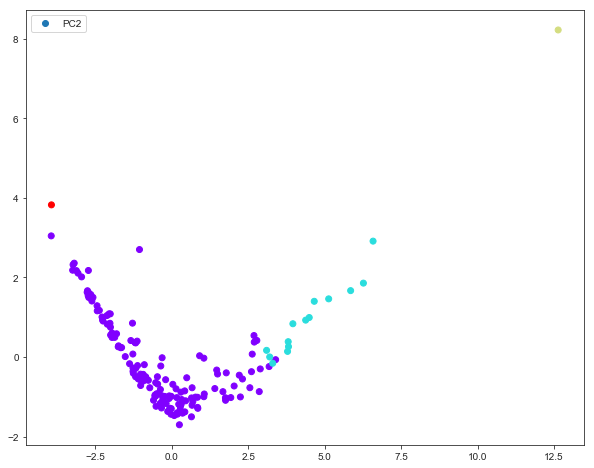

In [313]:
#Scatter plot for clusters formed
plt.figure(figsize=(10, 8))
plt.scatter(hie_pca_df.iloc[:,0],hie_pca_df.iloc[:,1], c=complete_cluster_labels, cmap='rainbow') 
plt.rcParams['figure.figsize']=(10,5)
plt.legend()

In [314]:
# trying with 5 clusters
# 5 clusters
complete_cluster_labels_5 = cut_tree(mergings_complete, n_clusters=5).reshape(-1, )
complete_cluster_labels_5

array([0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 4, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0])

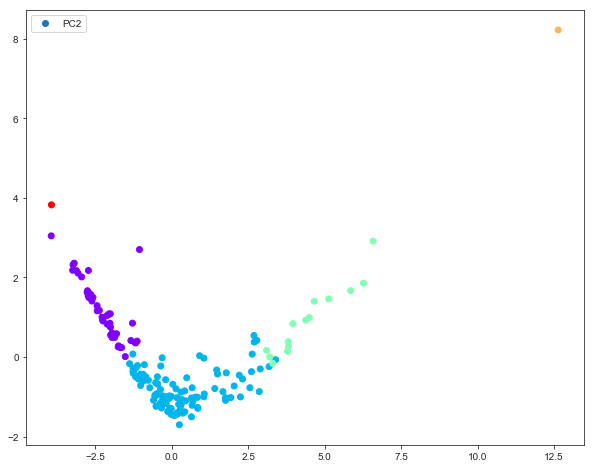

In [315]:
#Scatter plot for clusters formed
plt.figure(figsize=(10, 8))
plt.scatter(hie_pca_df.iloc[:,0],hie_pca_df.iloc[:,1], c=complete_cluster_labels_5, cmap='rainbow') 
plt.rcParams['figure.figsize']=(10,5)
plt.legend()

<p style="font-family: Arial; font-size:1.2em;color:blue;"> <i> 
We can observe that even after trying with no of clusters as 5, Hierarchical clustering is not able to deal with outliers properly. Hence we can go with optimal no of clusters as 4 to move on with the next steps of clustering process and analyze the results respectively.
    </i></p>

In [316]:
#merging clusterID with pca data
country_hie_df = pd.concat([pca_df_final_2,pd.Series(complete_cluster_labels)],axis=1)
country_hie_df.columns= ['country','PC1','PC2','PC3','PC4','ClusterID']
country_hie_df.head()

country       PC1       PC2       PC3       PC4  ClusterID
0          Afghanistan -2.636647  1.472085 -0.546500  0.237267          0
1              Albania -0.023845 -1.435816 -0.009080 -0.442921          0
2              Algeria -0.459260 -0.678794  0.967852 -0.176389          0
3               Angola -2.723581  2.176018  0.597794  0.438919          0
4  Antigua and Barbuda  0.648777 -1.026498 -0.244170 -0.267513          0

### Merging ClusterID's with original dataset

In [317]:
country_hie_df_org  = pd.merge(country_df, country_hie_df, how='inner', on='country')
country_hie_df_org.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp       PC1       PC2       PC3  \
0       9.44        56.2       5.82    553 -2.636647  1.472085 -0.546500   
1       4.49        76.3       1.65   4090 -0.023845 -1.435816 -0.009080   
2      16.10        76.5       2.89   4460 -0.459260 -0.678794  0.967852   
3      22.40        60.1       6.16   3530 -2.723581  2.176018  0.597794   
4       1.44        76.8       2.13  12200  0.648777 -1.026498 -0.244170   

        PC4  ClusterID  
0  0.237267          0  
1 -0.442921          0  
2 -0.176389          0  
3  0.438919          0  
4 -0.267513          0

In [318]:
#dropping principal components from original dataset
country_hie_df_org.drop(['PC1','PC2','PC3','PC4'], axis=1, inplace=True)

In [319]:
country_hie_df_org.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  ClusterID  
0       9.44        56.2       5.82    553          0  
1       4.49        76.3       1.65   4090          0  
2      16.10        76.5       2.89   4460          0  
3      22.40        60.1       6.16   3530          0  
4       1.44        76.8       2.13  12200          0

### gdpp, income, child mortality rate w.r.t. ClusterID's 

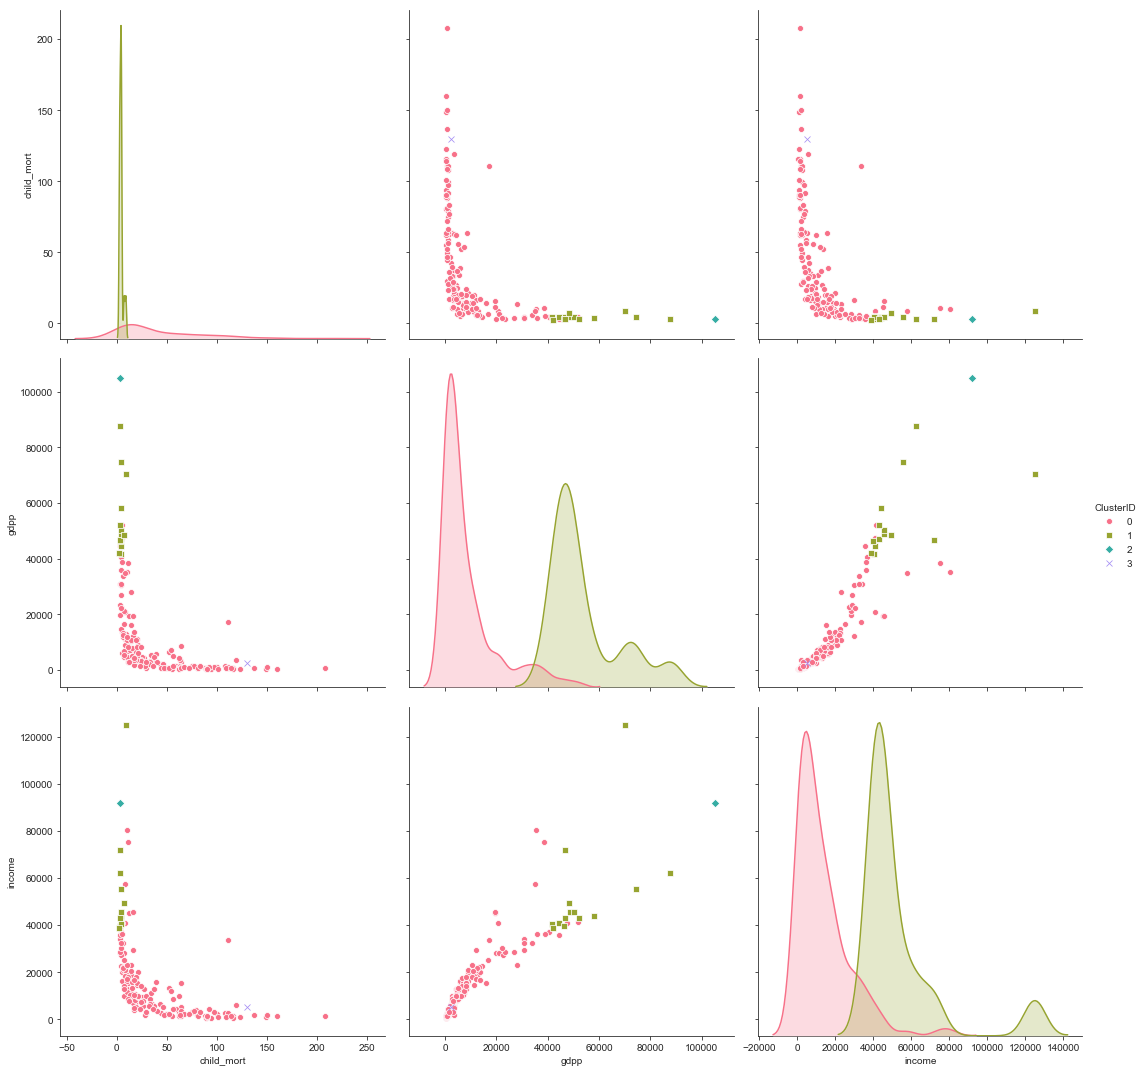

In [320]:
sns.set_style("ticks")
sns.pairplot(data=country_hie_df_org, vars=['child_mort','gdpp','income'], hue = "ClusterID", height=5,  markers=["o", "s", "D", "x"], palette = "husl"
)

<p style="font-family: Arial; font-size:1.2em;color:blue;"> <i> 
We can clearly observe from the above pair plot that Cluster with ClusterID-0 and ClusterID-3 has the list of under-developed countries.
Child mortality rate is high for Cluster-0 and Cluster-3 and gdpp and income is at a very low range for Cluster-0 and Cluster-3 as seen from the above pairplots.
</i></p> 


# Cluster Profiling for Hierarchical Clustering ->

In [321]:
#Calculating mean of each variable grouped by 'cluster ID'
child_mort_mean = pd.DataFrame(country_hie_df_org.groupby(['ClusterID']).child_mort.mean())
exports_mean = pd.DataFrame(country_hie_df_org.groupby(['ClusterID']).exports.mean())
health_mean = pd.DataFrame(country_hie_df_org.groupby(['ClusterID']).health.mean())
imports_mean = pd.DataFrame(country_hie_df_org.groupby(['ClusterID']).imports.mean())
income_mean = pd.DataFrame(country_hie_df_org.groupby(['ClusterID']).income.mean())
inflation_mean = pd.DataFrame(country_hie_df_org.groupby(['ClusterID']).inflation.mean())
life_expec_mean = pd.DataFrame(country_hie_df_org.groupby(['ClusterID']).life_expec.mean())
total_fer_mean = pd.DataFrame(country_hie_df_org.groupby(['ClusterID']).total_fer.mean())                           
gdpp_mean = pd.DataFrame(country_hie_df_org.groupby(['ClusterID']).gdpp.mean())  

In [322]:
child_mort_mean

child_mort
ClusterID            
0           41.040397
1            4.371429
2            2.800000
3          130.000000

In [323]:
country_profile_hier_df = pd.concat([child_mort_mean, exports_mean, health_mean, imports_mean, 
                                income_mean, inflation_mean, life_expec_mean, total_fer_mean, gdpp_mean], axis=1)

In [324]:
country_profile_hier_df.head()

child_mort        exports       health        imports  \
ClusterID                                                          
0           41.040397    3799.012301   626.433272    3664.759484   
1            4.371429   34375.214286  5257.599286   28383.621429   
2            2.800000  183750.000000  8158.500000  149100.000000   
3          130.000000     589.490000   118.131000     405.420000   

                 income   inflation  life_expec  total_fer           gdpp  
ClusterID                                                                  
0          13381.543046    7.724199   69.617219   3.044834    8607.178808  
1          53264.285714    1.828000   80.628571   1.790714   54142.857143  
2          91700.000000    3.620000   81.300000   1.630000  105000.000000  
3           5150.000000  104.000000   60.500000   5.840000    2330.000000

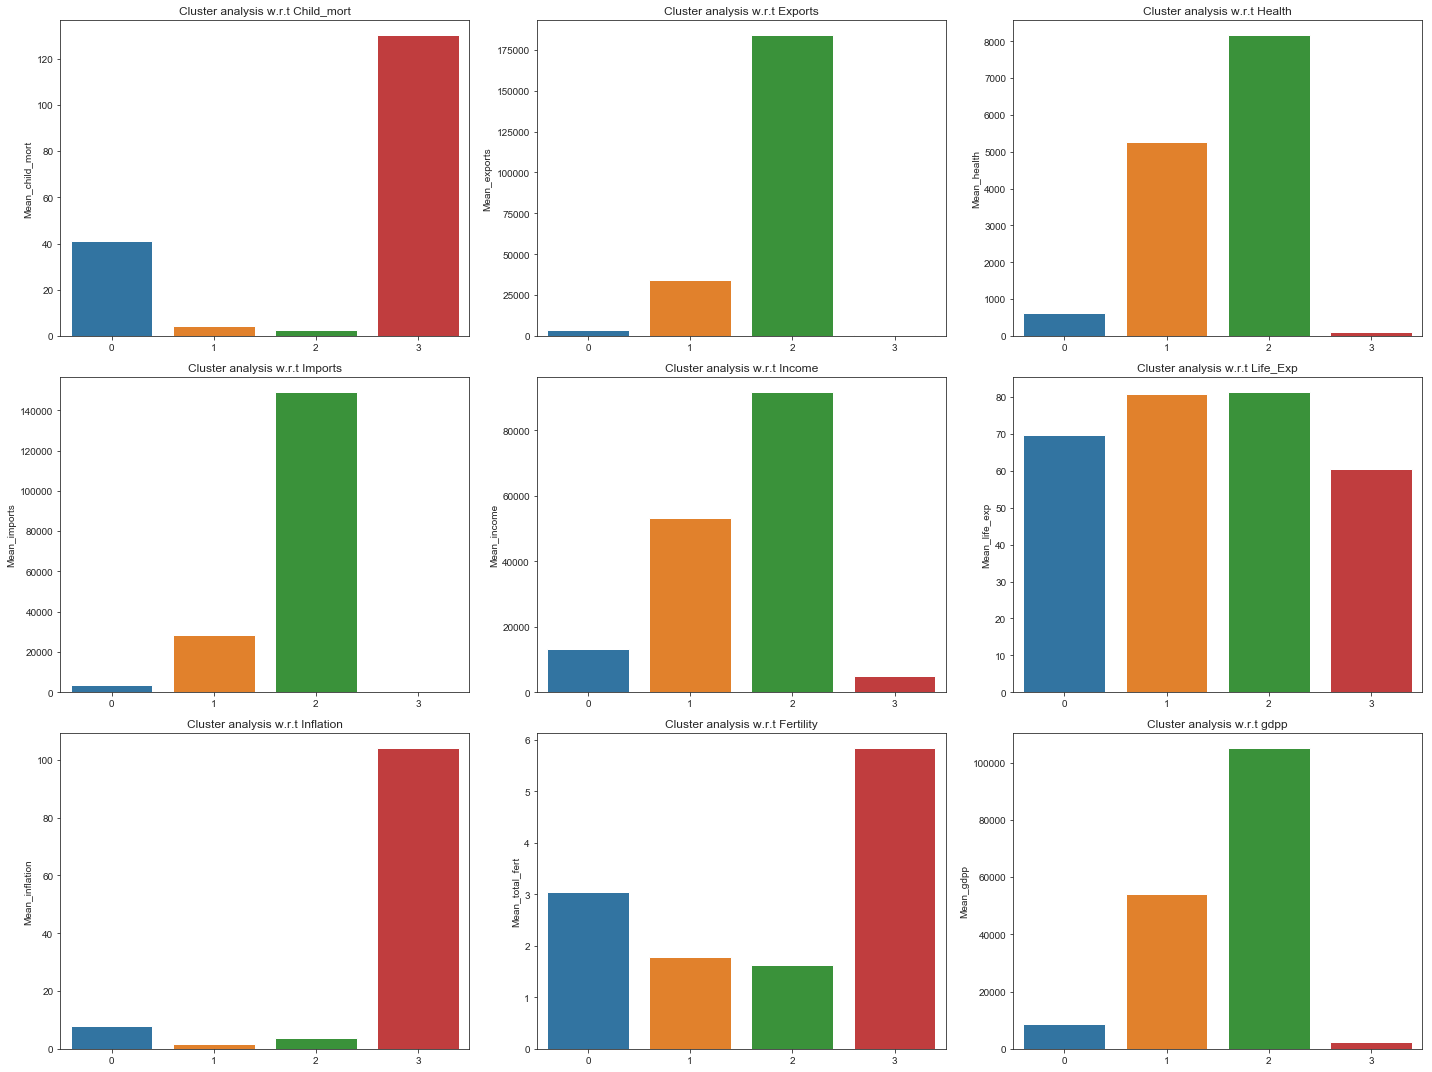

In [325]:
#plotting bar chart 
fig, axs= plt.subplots(3,3,figsize = (20,15))

# Child_mort
plt1 = sns.barplot(x=country_profile_hier_df.index, y=country_profile_hier_df.child_mort, ax = axs[0,0])
plt1.set(title = 'Cluster analysis w.r.t Child_mort', xlabel = '', ylabel= 'Mean_child_mort')

# Exports
plt2 = sns.barplot(x=country_profile_hier_df.index, y=country_profile_hier_df.exports, ax = axs[0,1])
plt2.set(title = 'Cluster analysis w.r.t Exports', xlabel = '', ylabel= 'Mean_exports')

# Health
plt3 = sns.barplot(x=country_profile_hier_df.index, y=country_profile_hier_df.health, ax = axs[0,2])
plt3.set(title = 'Cluster analysis w.r.t Health', xlabel = '', ylabel= 'Mean_health')

# Imports
plt4 = sns.barplot(x=country_profile_hier_df.index, y=country_profile_hier_df.imports, ax = axs[1,0])
plt4.set(title = 'Cluster analysis w.r.t Imports', xlabel = '', ylabel= 'Mean_imports')

# Income
plt5 = sns.barplot(x=country_profile_hier_df.index, y=country_profile_hier_df.income, ax = axs[1,1])
plt5.set(title = 'Cluster analysis w.r.t Income', xlabel = '', ylabel= 'Mean_income')

# Life_Exp
plt6 = sns.barplot(x=country_profile_hier_df.index, y=country_profile_hier_df.life_expec, ax = axs[1,2])
plt6.set(title = 'Cluster analysis w.r.t Life_Exp', xlabel = '', ylabel= 'Mean_life_exp')

# Inflation
plt7= sns.barplot(x=country_profile_hier_df.index, y=country_profile_hier_df.inflation, ax = axs[2,0])
plt7.set(title = 'Cluster analysis w.r.t Inflation', xlabel = '', ylabel= 'Mean_inflation')

# Fertility
plt8 = sns.barplot(x=country_profile_hier_df.index, y=country_profile_hier_df.total_fer, ax = axs[2,1])
plt8.set(title = 'Cluster analysis w.r.t Fertility', xlabel = '', ylabel= 'Mean_total_fert')

# gdpp
plt9 = sns.barplot(x=country_profile_hier_df.index, y=country_profile_hier_df.gdpp, ax = axs[2,2])
plt9.set(title = 'Cluster analysis w.r.t gdpp', xlabel = '', ylabel= 'Mean_gdpp')

plt.tight_layout()
plt.show()

<p style="font-family: Arial; font-size:1.2em;color:blue;"> <i> 
    From above bar plots, we can conclude that Cluster with <u><b> ClusterID - 0 and 3 </b></u>, is the cluster which contains the list of under developed countries and cluster with<u> <b>ClusterID - 2 and 1</b></u>, is the cluster which contains the list of developed countries.

</i></p> 


In [326]:
country_hie_df_org['ClusterID'].value_counts()

0    151
1     14
3      1
2      1
Name: ClusterID, dtype: int64

In [327]:
len(country_hie_df_org[country_hie_df_org.ClusterID == 0])

151

In [328]:
country_hie_df_org[(country_hie_df_org.ClusterID == 3) | (country_hie_df_org.ClusterID == 0)].country.values

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus',
       'Czech Republic', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',
       'Haiti', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel',
       'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan',


List of first 10 countries in cluster 3 and 0 with respect to [gdpp, child_mort and income] variables which are in dire need of help.

In [329]:
country_hie_df_org.sort_values(by = ['child_mort','income','gdpp'], ascending=False).head(10)

country  child_mort   exports    health   imports  \
66                      Haiti       208.0   101.286   45.7442   428.314   
132              Sierra Leone       160.0    67.032   52.2690   137.655   
32                       Chad       150.0   330.096   40.6341   390.195   
31   Central African Republic       149.0    52.628   17.7508   118.190   
97                       Mali       137.0   161.424   35.2584   248.508   
113                   Nigeria       130.0   589.490  118.1310   405.420   
112                     Niger       123.0    77.256   17.9568   170.868   
3                      Angola       119.0  2199.190  100.6050  1514.370   
25               Burkina Faso       116.0   110.400   38.7550   170.200   
37           Congo, Dem. Rep.       116.0   137.274   26.4194   165.664   

     income  inflation  life_expec  total_fer  gdpp  ClusterID  
66     1500       5.45        32.1       3.33   662          0  
132    1220      17.20        55.0       5.20   399          0  
32     1930       6.39        56.5       6.59   897          0  
31      888       2.01        47.5       5.21   446          0  
97     1870       4.37        59.5       6.55   708          0  
113    5150     104.00        60.5       5.84  2330          3  
112     814       2.55        58.8       7.49   348          0  
3      5900      22.40        60.1       6.16  3530          0  
25     1430       6.81        57.9       5.87   575          0  
37      609      20.80        57.5       6.54   334          0


<p style="font-family: Arial; font-size:1.2em;color:blue;"> <i> 
Mentioned above is the list of first 10 countries which are in dire need of aid and help. 


</i></p> 


# Conclusion ->

We can say that first 10 countries obtained which are in dire need to help as mentioned above are same for both hierarchical clustering and Kmeans clustering.

But as mentioned already in the beginning of this jupyter notebook that outliers are reported but they are not removed as to get all the conuntries related data even in terms of extreme low and high values which are also important to the business. and if we removed them then it would not have been an accurate analysis for clustering purpose.

Also, Kmeans have worked really well even if there are few outliers present in the dataset while hierarchical clustering has not performed well in case of outliers and data got divided into two clusters for low economy countries in case of hierarchical clustering.

But the first set of countries remain the same in case of both kmeans and hierarchical clustering and they are in dire need of help and financial aid.

1. Haiti
2. Sierra Leone
3. Chad
4. Central African Republic
5. Mali
6. Nigeria
7. Niger
8. Angola
9. Burkina Faso
10. Congo, Dem. Rep.
11. Guinea-Bissau
12. Equatorial Guinea
13. Cote d'Ivoire
14. Benin
15. Guinea
16. Cameroon
17. Mozambique
18. Lesotho
19. Mauritania
20. Burundi